In [2]:
import numpy as np
import scipy.stats as stat
import re
import os
import sys
sys.path.insert(0, 'D:/software/')
from Biomol import HDF5_trast as t5
from Biomol import StyleTools as st
from Biomol import ImageLab as iml

import h5py
import pandas as pd
from pandas import DataFrame

import pytiff
from PIL import Image
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

%load_ext autoreload
%autoreload 2


    
  


In [3]:
# Structure of the TRAST file
file = r'D:/new trast test data/MBlue.hdf5'
with h5py.File(file,'r') as f:
    for key in f.keys():
        print(key)
        for i in np.array(f[key]):
            print(i)
            

001_pH_5.84_MB_255uW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
002_pH_6.03_MB_253uW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
003_pH_8.14_MB_252uW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
004_pH_9.04_MB_256uW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
005_pH_10.03_MB_256uW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
006_pH_11.03_MB_258uW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
007_pH_11.03_MB_258uW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
008_pH_12.07_MB_258uW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
009_pH_5.00_MB_258uW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
010_pH_3.97_MB_258uW.fit

001_pH_5.84_MB_255uW.fit
[1.000000e-01 1.375000e-01 1.875000e-01 2.625000e-01 3.500000e-01
 4.875000e-01 6.750000e-01 9.250000e-01 1.275000e+00 1.737500e+00
 2.400000e+00 3.287500e+00 4.525000e+00 6.212500e+00 8.537500e+00
 1.172500e+01 1.610000e+01 2.212500e+01 3.038750e+01 4.175000e+01
 5.736250e+01 7.880000e+01 1.082625e+02 1.487375e+02 2.043375e+02
 2.807250e+02 3.856625e+02 5.298375e+02 7.279000e+02 1.000000e+03]
002_pH_6.03_MB_253uW.fit
[1.000000e-01 1.375000e-01 1.875000e-01 2.625000e-01 3.500000e-01
 4.875000e-01 6.750000e-01 9.250000e-01 1.275000e+00 1.737500e+00
 2.400000e+00 3.287500e+00 4.525000e+00 6.212500e+00 8.537500e+00
 1.172500e+01 1.610000e+01 2.212500e+01 3.038750e+01 4.175000e+01
 5.736250e+01 7.880000e+01 1.082625e+02 1.487375e+02 2.043375e+02
 2.807250e+02 3.856625e+02 5.298375e+02 7.279000e+02 1.000000e+03]
003_pH_8.14_MB_252uW.fit
[1.000000e-01 1.375000e-01 1.875000e-01 2.625000e-01 3.500000e-01
 4.875000e-01 6.750000e-01 9.250000e-01 1.275000e+00 1.737500e+00

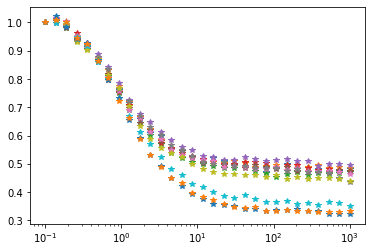

In [4]:
with h5py.File(file,'r') as f:
    for key in f.keys():
        print(key)
        N= np.max(f[key]['TRAST'][:,0])
        arry_x=np.array(f[key]['tp'][:])
        arry_y=np.array(f[key]['TRAST']/N)
        arry_y=arry_y[0]
        print(arry_x)
        plt.semilogx(arry_x,arry_y,marker='*',linestyle='none')

In [5]:
def pickData(filename,Data):
    d=[]
    with h5py.File(file,'r') as f:
        for key in f.keys():
            d.append((f[key][Data]))
        return np.array(d)

In [6]:
pickData(file,'tp')

array([[1.000000e-01, 1.375000e-01, 1.875000e-01, 2.625000e-01,
        3.500000e-01, 4.875000e-01, 6.750000e-01, 9.250000e-01,
        1.275000e+00, 1.737500e+00, 2.400000e+00, 3.287500e+00,
        4.525000e+00, 6.212500e+00, 8.537500e+00, 1.172500e+01,
        1.610000e+01, 2.212500e+01, 3.038750e+01, 4.175000e+01,
        5.736250e+01, 7.880000e+01, 1.082625e+02, 1.487375e+02,
        2.043375e+02, 2.807250e+02, 3.856625e+02, 5.298375e+02,
        7.279000e+02, 1.000000e+03],
       [1.000000e-01, 1.375000e-01, 1.875000e-01, 2.625000e-01,
        3.500000e-01, 4.875000e-01, 6.750000e-01, 9.250000e-01,
        1.275000e+00, 1.737500e+00, 2.400000e+00, 3.287500e+00,
        4.525000e+00, 6.212500e+00, 8.537500e+00, 1.172500e+01,
        1.610000e+01, 2.212500e+01, 3.038750e+01, 4.175000e+01,
        5.736250e+01, 7.880000e+01, 1.082625e+02, 1.487375e+02,
        2.043375e+02, 2.807250e+02, 3.856625e+02, 5.298375e+02,
        7.279000e+02, 1.000000e+03],
       [1.000000e-01, 1.375000

In [7]:
def pickData1(filename,key,Data):
    with h5py.File(filename,'r') as f:
        for key in f.keys():
            return f[key][Data][:]

In [8]:
pickData1(file,'004_Vesicle_1_5000NAO-noTempo_1_100CL_Air_ND1_003.fit','TRAST')

array([[633.18073377, 630.87508838, 622.08375651, 595.74006873,
        578.07003074, 544.18283261, 517.80424635, 481.20018125,
        452.14852987, 417.73839799, 385.32611829, 379.1087093 ,
        352.57814928, 344.88781399, 332.65053033, 327.96433928,
        328.92830227, 323.73009645, 315.55515343, 310.98495543,
        304.98830339, 298.96483355, 307.3080177 , 315.37508102,
        308.07702211, 308.64813284, 305.91375046, 300.07882154,
        301.59353457, 305.26150584]])

In [9]:
pickData(file,'HDfit')

array([[[ 636.91366338,  636.04542788,  635.13606329, ...,
          301.92863537,  301.83698795,  301.7409991 ]],

       [[ 701.751498  ,  700.80641201,  699.81655645, ...,
          332.31382748,  332.21280513,  332.10699727]],

       [[ 862.31444614,  861.15307529,  859.93668926, ...,
          393.63844969,  393.51447737,  393.38463237]],

       ...,

       [[1125.95373155, 1124.33051854, 1122.63041247, ...,
          398.58975269,  398.43554269,  398.27402761]],

       [[1266.82965013, 1264.98742054, 1263.05792288, ...,
          404.07822945,  403.91009076,  403.73398719]],

       [[1106.99466525, 1105.3858439 , 1103.70081124, ...,
          355.93001772,  355.78271253,  355.62842935]]])

In [10]:
# show all the TRAST data
t5.pickDataset(file,'tp')

array([1.000000e-01, 1.375000e-01, 1.875000e-01, 2.625000e-01,
       3.500000e-01, 4.875000e-01, 6.750000e-01, 9.250000e-01,
       1.275000e+00, 1.737500e+00, 2.400000e+00, 3.287500e+00,
       4.525000e+00, 6.212500e+00, 8.537500e+00, 1.172500e+01,
       1.610000e+01, 2.212500e+01, 3.038750e+01, 4.175000e+01,
       5.736250e+01, 7.880000e+01, 1.082625e+02, 1.487375e+02,
       2.043375e+02, 2.807250e+02, 3.856625e+02, 5.298375e+02,
       7.279000e+02, 1.000000e+03, 1.000000e-01, 1.375000e-01,
       1.875000e-01, 2.625000e-01, 3.500000e-01, 4.875000e-01,
       6.750000e-01, 9.250000e-01, 1.275000e+00, 1.737500e+00,
       2.400000e+00, 3.287500e+00, 4.525000e+00, 6.212500e+00,
       8.537500e+00, 1.172500e+01, 1.610000e+01, 2.212500e+01,
       3.038750e+01, 4.175000e+01, 5.736250e+01, 7.880000e+01,
       1.082625e+02, 1.487375e+02, 2.043375e+02, 2.807250e+02,
       3.856625e+02, 5.298375e+02, 7.279000e+02, 1.000000e+03,
       1.000000e-01, 1.375000e-01, 1.875000e-01, 2.6250

In [11]:
save = False
save_pdf = False

In [12]:
def TRASTaxes(fig, size=(6,5), ratio=0.2):
    
    # Structure

    axMain = fig.add_axes([0, ratio, 1, 1-ratio])
    axRes = fig.add_axes([0, 0, 1, ratio])
    
    # Style
    axMain.get_xaxis().set_visible(False)
    axRes.set_xscale('log')
    axMain.set_xscale('log')
    
    return fig, axMain, axRes   

In [13]:
# Function for making box plots with all data points shown within
def dotBox(df,col='kt',by=['CoA','SP'],rot=0, ax=None, ylim = None, color=None, alpha=0.5):
    
    if not ax == None:
        df.boxplot(column=col, by=by,figsize=(15,7),rot=rot,notch=True, bootstrap=1000, showfliers=False, ax=ax)
    else:
        df.boxplot(column=col, by=by,figsize=(15,7),rot=rot,notch=True, bootstrap=1000, showfliers=False)
    
    for i,d in enumerate(df.groupby(by)):
        y = d[1][col]
        x = np.random.normal(i+1, 0.1, len(y))
        if not color == None:
            plt.plot(x, y, mec='none', ms=4, marker="o", linestyle="None",alpha=alpha, color=color[i])  
        else:
            plt.plot(x, y, mec='none', ms=4, marker="o", linestyle="None",alpha=alpha)  
        
    if not ylim == None:
        ax.set_ylim(ylim)
        
    fig = ax.get_figure()
    fig.suptitle('')
    ax.set_title('')

In [14]:
def significance(data1, data2):
    
    import scipy.stats as stat
    
    #s, p = stat.ttest_ind(a, b)
    #print('Welch\'s T-test:' +'statistic = '+str(s)+', p-value = '+str(p))
    s, p = stat.mannwhitneyu(data1, data2)
    
    # s = statistic
    # p = p-value
    # level = significance level (1 = 5 %, 2 = 1 %, 3 = 0.1 %)
    
    level=0
    if p <= 0.05:
        level=1
    if p <= 0.01:
        level=2
    if p <= 0.001:
        level=3
    
    return p, level

In [15]:
# Style definitions
axstyle = {'LegendSize':9,
           'LabelSize':10,
           'MajorTickWidth':1,
           'MajorTickLength':7,
           'MinorTickWidth':1,
           'MinorTickLength':3,
           'LabelFont':'Arial',
           'LegendFont':'Arial'}

inset_style = {'LegendSize':8,
               'LabelSize':8,
               'MajorTickWidth':1,
               'MajorTickLength':3,
               'MinorTickWidth':1,
               'MinorTickLength':1.5,
               'LabelFont':'Arial',
               'XLabelPad':-2,
               'YLabelPad':-3,
               'LegendFont':'Arial',
               'TickPad':1}

marker_style = {'markersize':2,
               'linestyle':'none',
               'marker':'s'}

line_style = {'linewidth':1.3}

dashed_line_style = {'linewidth':1.3,
                     'linestyle':'dashed',
                     'color':'gray'}

errorbar_style = {'markersize':4,
                  'linewidth':1.3,
                  'elinewidth':1.3,
                  'capsize':3}

legend_style = {'handlelength':1,
                'labelspacing':0.03}

TRAST_axis_label = {'xlabel':r'Pulse duration ($\mu$s)',
                    'ylabel':r'$\langle F_{exc}(w)\rangle_{norm}$'}

TRAST_axis_label_off = {'xlabel':r'Pulse duration ($\mu$s)',
                        'ylabel':r' ',
                        'rlabel':r' '}

panel_labelstyle={'fontsize':12, 'horizontalalignment':'center'}
text_labelstyle={'fontsize':12, 'horizontalalignment':'center'}

dashcolor = [0.2, 0.2, 0.2]

logminors = list(np.linspace(2, 9, 8)*0.1)+list(np.linspace(2, 9, 8))+list(np.linspace(2, 9, 8)*10)+\
            list(np.linspace(2, 9, 8)*100)+list(np.linspace(2, 9, 8)*1000)

In [ ]:
#数据导入绘图后，在绘制legend的时候再改的方法，改变legend 的顺序

[<matplotlib.lines.Line2D object at 0x00000244E115E908>, <matplotlib.lines.Line2D object at 0x00000244E115E748>, <matplotlib.lines.Line2D object at 0x00000244E1C1CB38>, <matplotlib.lines.Line2D object at 0x00000244E1490B00>, <matplotlib.lines.Line2D object at 0x00000244E15A7AC8>, <matplotlib.lines.Line2D object at 0x00000244E15A9A90>, <matplotlib.lines.Line2D object at 0x00000244E15B8A58>, <matplotlib.lines.Line2D object at 0x00000244E0F91978>, <matplotlib.lines.Line2D object at 0x00000244E0F84908>, <matplotlib.lines.Line2D object at 0x00000244E0FB7898>, <matplotlib.lines.Line2D object at 0x00000244E19A3828>, <matplotlib.lines.Line2D object at 0x00000244E19A4860>]
['pH 5.84', 'pH 6.03', 'pH 8.14', 'pH 9.04', 'pH 10.03', 'pH 11.03', 'pH 11.03', 'pH 12.07', 'pH 5.00', 'pH 3.97', 'pH 3.0', 'pH 1.9']


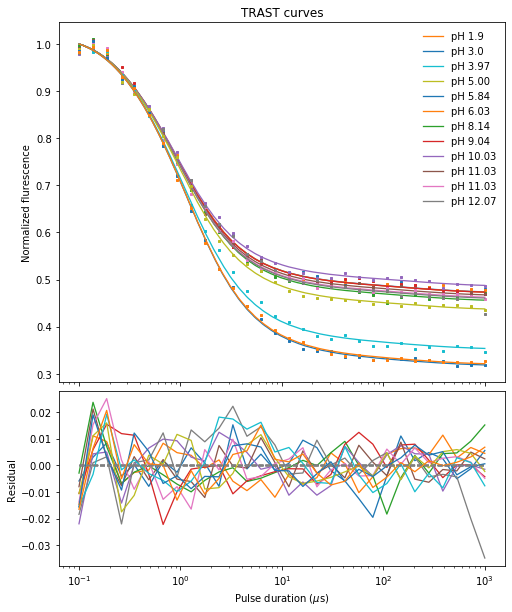

In [40]:
def plotFig(filename):
    plt.figure(figsize=(8,10))
    gs = gridspec.GridSpec(3,3,hspace=0.05)
    ax1=plt.subplot(gs[:-1,:])
    ax2=plt.subplot(gs[-1,:])
    with h5py.File(filename,'r') as f:
        for k in f.keys():
            for i, N in enumerate(f[k]['HDfit'][:,0]):
                M= np.max(f[k]['HDfit'][i,:])
                tp = f[k]['tp'][:]
                ind = np.argsort(tp)
                residual = f[k]['residual'][i,:]
                hPlot = ax1.semilogx(f[k]['tp'],f[k]['TRAST'][i,:]/N, **marker_style)
                ax1.semilogx(f[k]['HDtp'],f[k]['HDfit'][i,:]/N, color=hPlot[0].get_color(),label=(k.split('_')[1]+' '+k.split('_')[2]), **line_style)
                hPlot = ax2.semilogx(f[k]['tp'],f[k]['residual'][i,:],**line_style)
                ax2.semilogx(np.array([tp[ind][0], tp[ind][-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = ax1.get_legend_handles_labels()
    pH=[]
    print(handles)
    print(labels)
    for i in labels:
        pH.append(float(i.split(' ')[1]))
   
        
    ind=np.argsort(pH)
    
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    ax1.set_title('TRAST curves')
    ax1.legend(loc='best',frameon=False,handles=newhandles,labels=newlabels) 
    ax1.set_xticks([0.1, 1, 10, 100, 1000])
    ax1.set_ylabel('Normalized flurescence')
  
    ax2.set_xticks([0.1, 1, 10, 100, 1000])
    ax2.set_xlabel('Pulse duration ($\u03BC$s)')
    ax2.set_ylabel('Residual')
    
    plt.show()

plotFig(file)

C:\Users\duzhx\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\duzhx\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
C:\Users\duzhx\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same argum

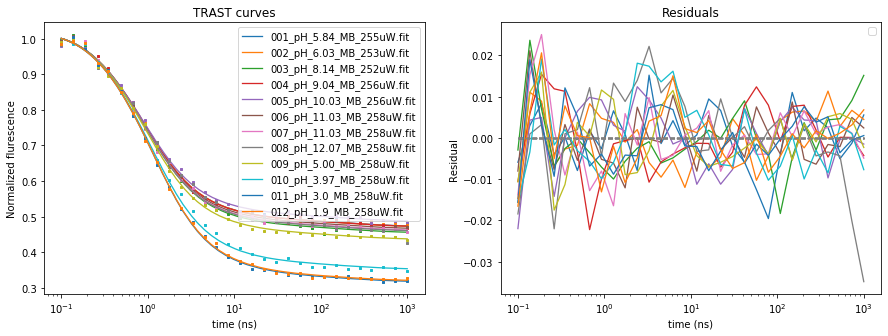

In [38]:
def plotFig(filename):
    plt.figure(figsize=(15,5))
    with h5py.File(filename,'r') as f:
        for k in f.keys():
            for i, N in enumerate(f[k]['HDfit'][:,0]):
                M= np.max(f[key]['HDfit'][i,:])
                tp = f[key]['tp'][:]
                ind = np.argsort(tp)
                residual = f[key]['residual'][i,:]
                plt.subplot(121)
                hPlot = plt.semilogx(f[k]['tp'],f[k]['TRAST'][i,:]/N, **marker_style)
                plt.semilogx(f[k]['HDtp'],f[k]['HDfit'][i,:]/N, color=hPlot[0].get_color(),label=str(k), **line_style)
                plt.subplot(122)
                hPlot = plt.semilogx(f[k]['tp'],f[k]['residual'][i,:],**line_style)
                plt.semilogx(np.array([tp[ind][0], tp[ind][-1]]), np.array([0, 0]), **dashed_line_style)
    plt.subplot(121)
    plt.title('TRAST curves')
    plt.legend(loc='best') 
    plt.xticks([0.1, 1, 10, 100, 1000])
    plt.xlabel('time (ns)')
    plt.ylabel('Normalized flurescence')
    plt.subplot(122)
    plt.legend(loc='best') 
    plt.title('Residuals')
    plt.xticks([0.1, 1, 10, 100, 1000])
    plt.xlabel('time (ns)')
    plt.ylabel('Residual')

    plt.show()

plotFig(file)

In [19]:
with h5py.File(file,'r') as f:
        for k in f.keys():
            print(k)
            

001_pH_5.84_MB_255uW.fit
002_pH_6.03_MB_253uW.fit
003_pH_8.14_MB_252uW.fit
004_pH_9.04_MB_256uW.fit
005_pH_10.03_MB_256uW.fit
006_pH_11.03_MB_258uW.fit
007_pH_11.03_MB_258uW.fit
008_pH_12.07_MB_258uW.fit
009_pH_5.00_MB_258uW.fit
010_pH_3.97_MB_258uW.fit
011_pH_3.0_MB_258uW.fit
012_pH_1.9_MB_258uW.fit


In [48]:
'''
with h5py.File(file,'r+') as f:
    f["010_pH_3.97_MB_258uW.fit"]=f["010_pH3.97_MB_258uW.fit"]
    del f["010_pH3.97_MB_258uW.fit"]
    f.close()
    '''

In [37]:
with h5py.File(file,'r') as f:
    ph=[]
    for i in f:
        ph.append(float((i.split('_')[2])))
    num=np.argsort(ph)
    print(ind)

[11 10  9  8  0  1  2  3  4  5  6  7]


In [ ]:
#从一开始画图就已经将数据按照名字进行了排序的方法，会导致legend的顺序正确

[11 10  9  8  0  1  2  3  4  5  6  7]


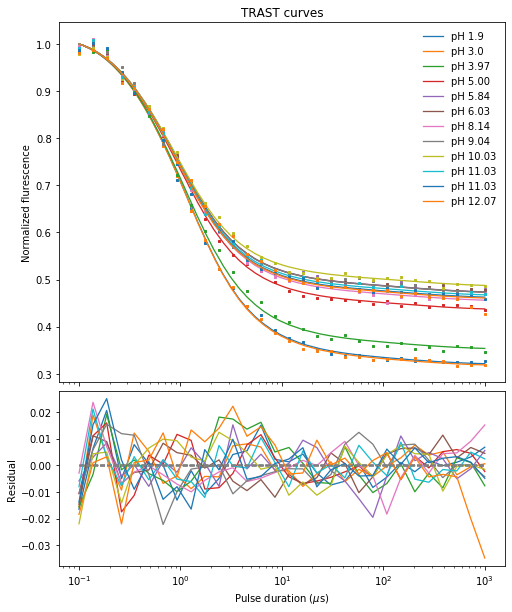

In [46]:
with h5py.File(file,'r') as f:
    ph=[]
    for i in f:
        ph.append(float((i.split('_')[2])))
    num=np.argsort(ph)
    print(num)
def plotFig(filename):
    plt.figure(figsize=(8,10))
    gs = gridspec.GridSpec(3,3,hspace=0.05)
    ax1=plt.subplot(gs[:-1,:])
    ax2=plt.subplot(gs[-1,:])
    with h5py.File(filename,'r') as f:
        for n in num:
            k=list(f.keys())[n]
            for i, N in enumerate(f[k]['HDfit'][:,0]):
                M= np.max(f[key]['HDfit'][i,:])
                tp = f[k]['tp'][:]
                ind = np.argsort(tp)
                residual = f[k]['residual'][i,:]
                hPlot = ax1.semilogx(f[k]['tp'],f[k]['TRAST'][i,:]/N, **marker_style)
                ax1.semilogx(f[k]['HDtp'],f[k]['HDfit'][i,:]/N, color=hPlot[0].get_color(),label=(k.split('_')[1]+' '+k.split('_')[2]), **line_style)
                hPlot = ax2.semilogx(f[k]['tp'],f[k]['residual'][i,:],**line_style)
                ax2.semilogx(np.array([tp[ind][0], tp[ind][-1]]), np.array([0, 0]), **dashed_line_style)
    
    
    
        
    ax1.set_title('TRAST curves')
    ax1.legend(loc='best',frameon=False) 
    ax1.set_xticks([0.1, 1, 10, 100, 1000])
    ax1.set_ylabel('Normalized flurescence')
  
    ax2.set_xticks([0.1, 1, 10, 100, 1000])
    ax2.set_xlabel('Pulse duration ($\u03BC$s)')
    ax2.set_ylabel('Residual')
    
    plt.show()

plotFig(file)